In [30]:
import torch

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
import os
import string
from string import punctuation
from os import listdir
from os import chdir as cd
from collections import Counter
import nltk
from nltk import PorterStemmer 
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from xgboost import XGBClassifier
sns.set() 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('/content/IMDB Dataset.csv')
y = df['sentiment'].map({'positive': 1, 'negative': 0})


In [ ]:
#remove punctuations
def punctuation(sentence):
    review = [letters.lower() for letters in sentence if letters not in string.punctuation ]
    review = ''.join(review)
    return review

df['cleaned_review'] = df['review'].apply(punctuation)

In [ ]:
#removing stopwords
stopwords1 = nltk.corpus.stopwords.words('english')

def stopwords(sentence):
    review = [words for words in sentence.split() if words not in stopwords1]
    review = ' '.join(review)
    return review

df['cleaned_review'] = df['cleaned_review'].apply(stopwords)

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    lemmatized_words = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    return ' '.join(lemmatized_words)

df['cleaned_review'] = df.cleaned_review.apply(lemmatize_text)
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching 1 oz episode y...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [ ]:
#stemming
ps = PorterStemmer() 
df['cleaned_review'] = dfd['cleaned_review'].apply(ps.stem)
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching 1 oz episode y...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


# Exploratory Data Analysis

# Word Cloud for entire Text

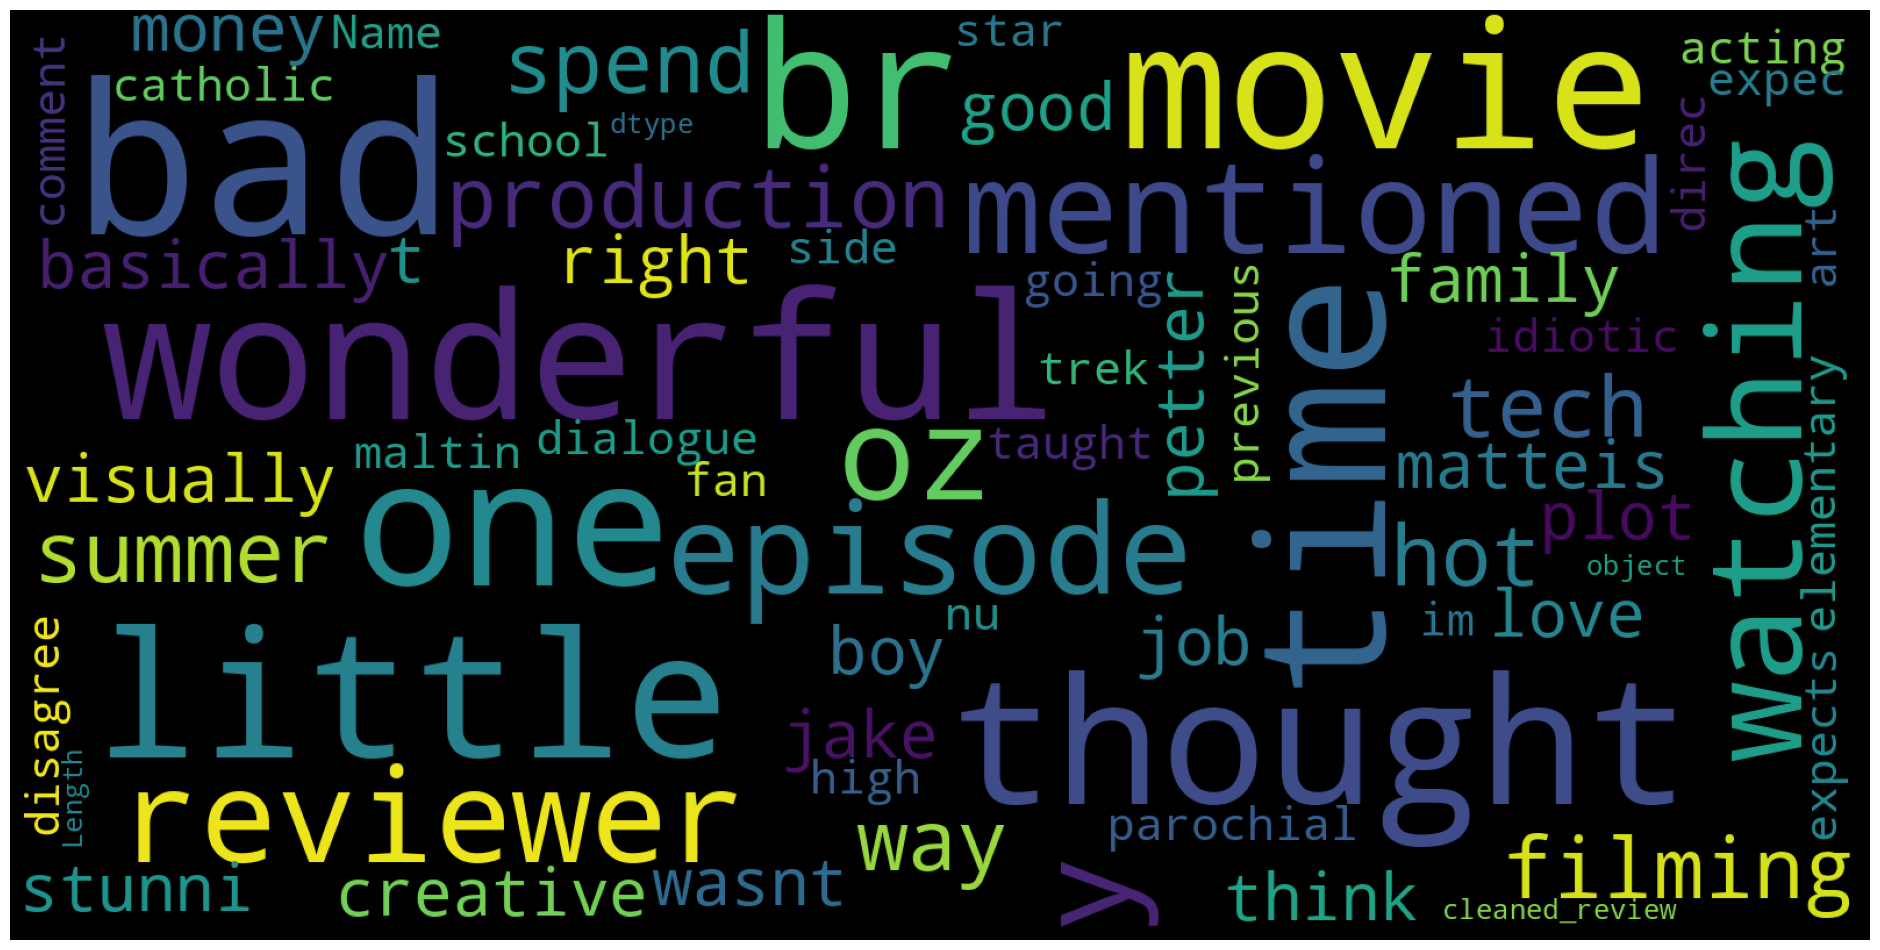

In [ ]:
# creating a word-cloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title=None):
    wordcloud = WordCloud(
        background_color="black",
        stopwords=stopwords,
        max_words=300,
        max_font_size=45,
        scale=4,
        random_state=1,
    ).generate(str(data))

    fig = plt.figure(1, figsize=(24, 24))
    plt.axis("off")
    if title:
        fig.suptitle(title, fontsize=21)
        fig.subplots_adjust(top=2.1)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(df["cleaned_review"])

#Word Cloud for text with positive sentiment

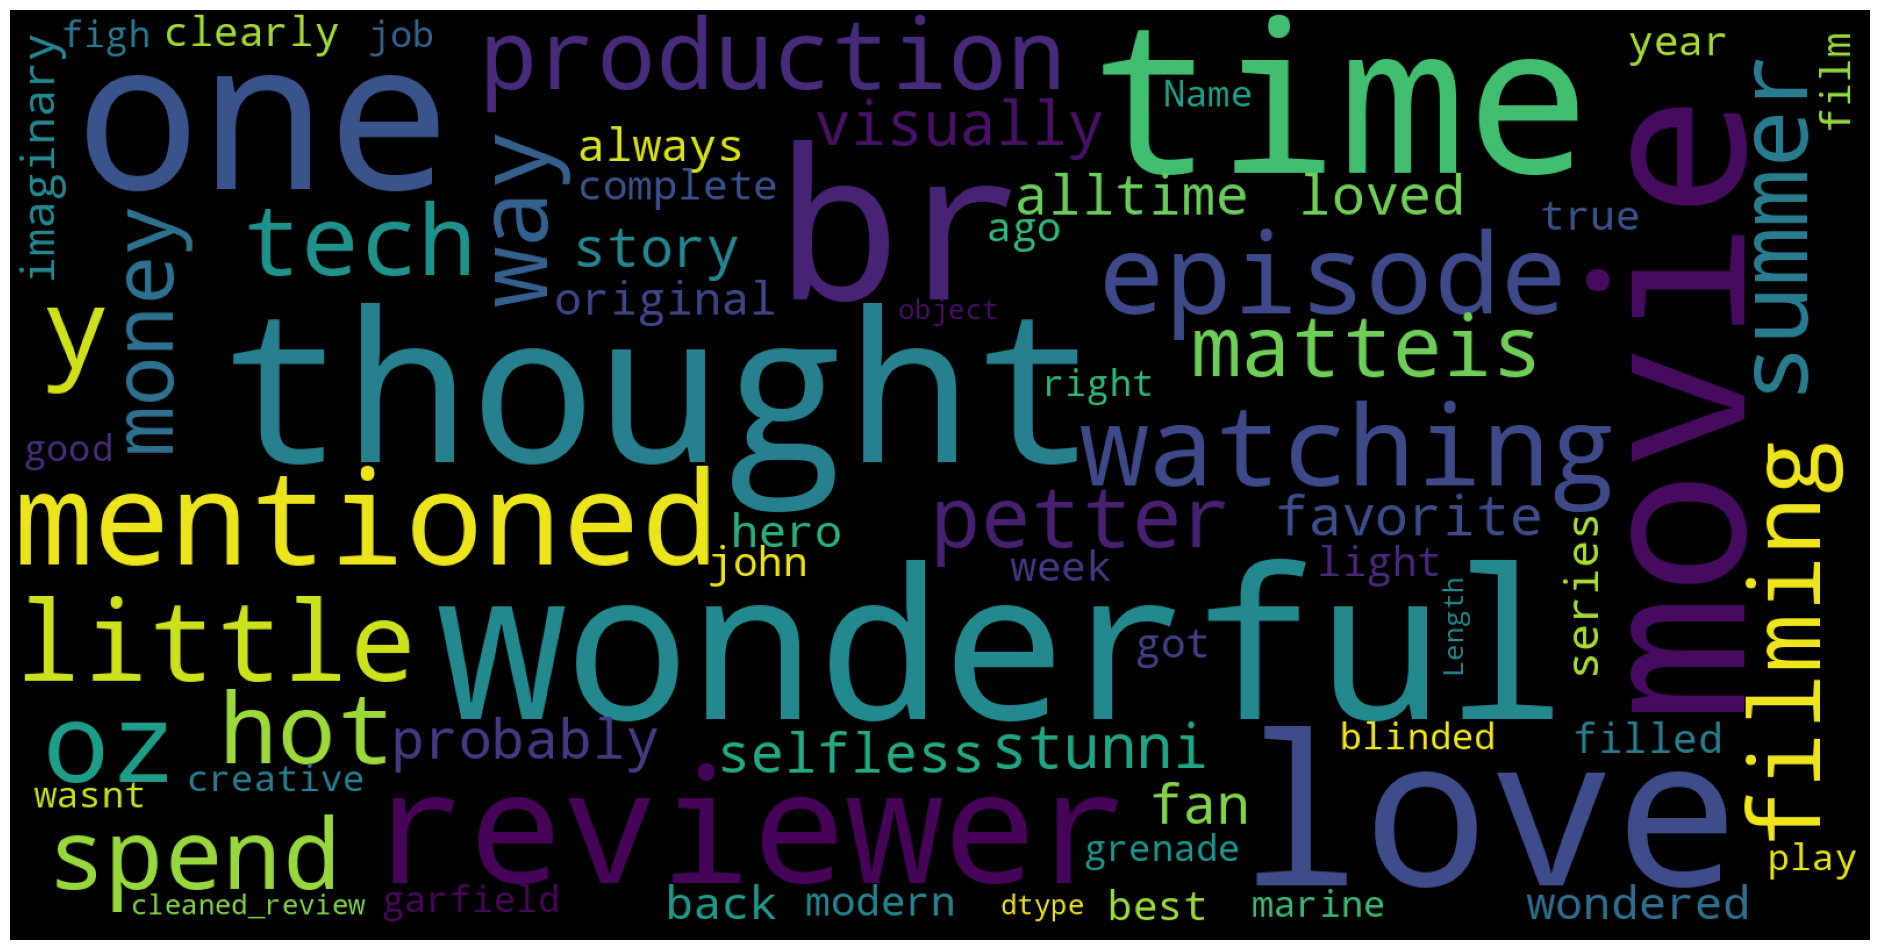

In [ ]:
show_wordcloud(df[df["sentiment"] == "positive"]["cleaned_review"])

#Word Cloud for text with negative sentiment

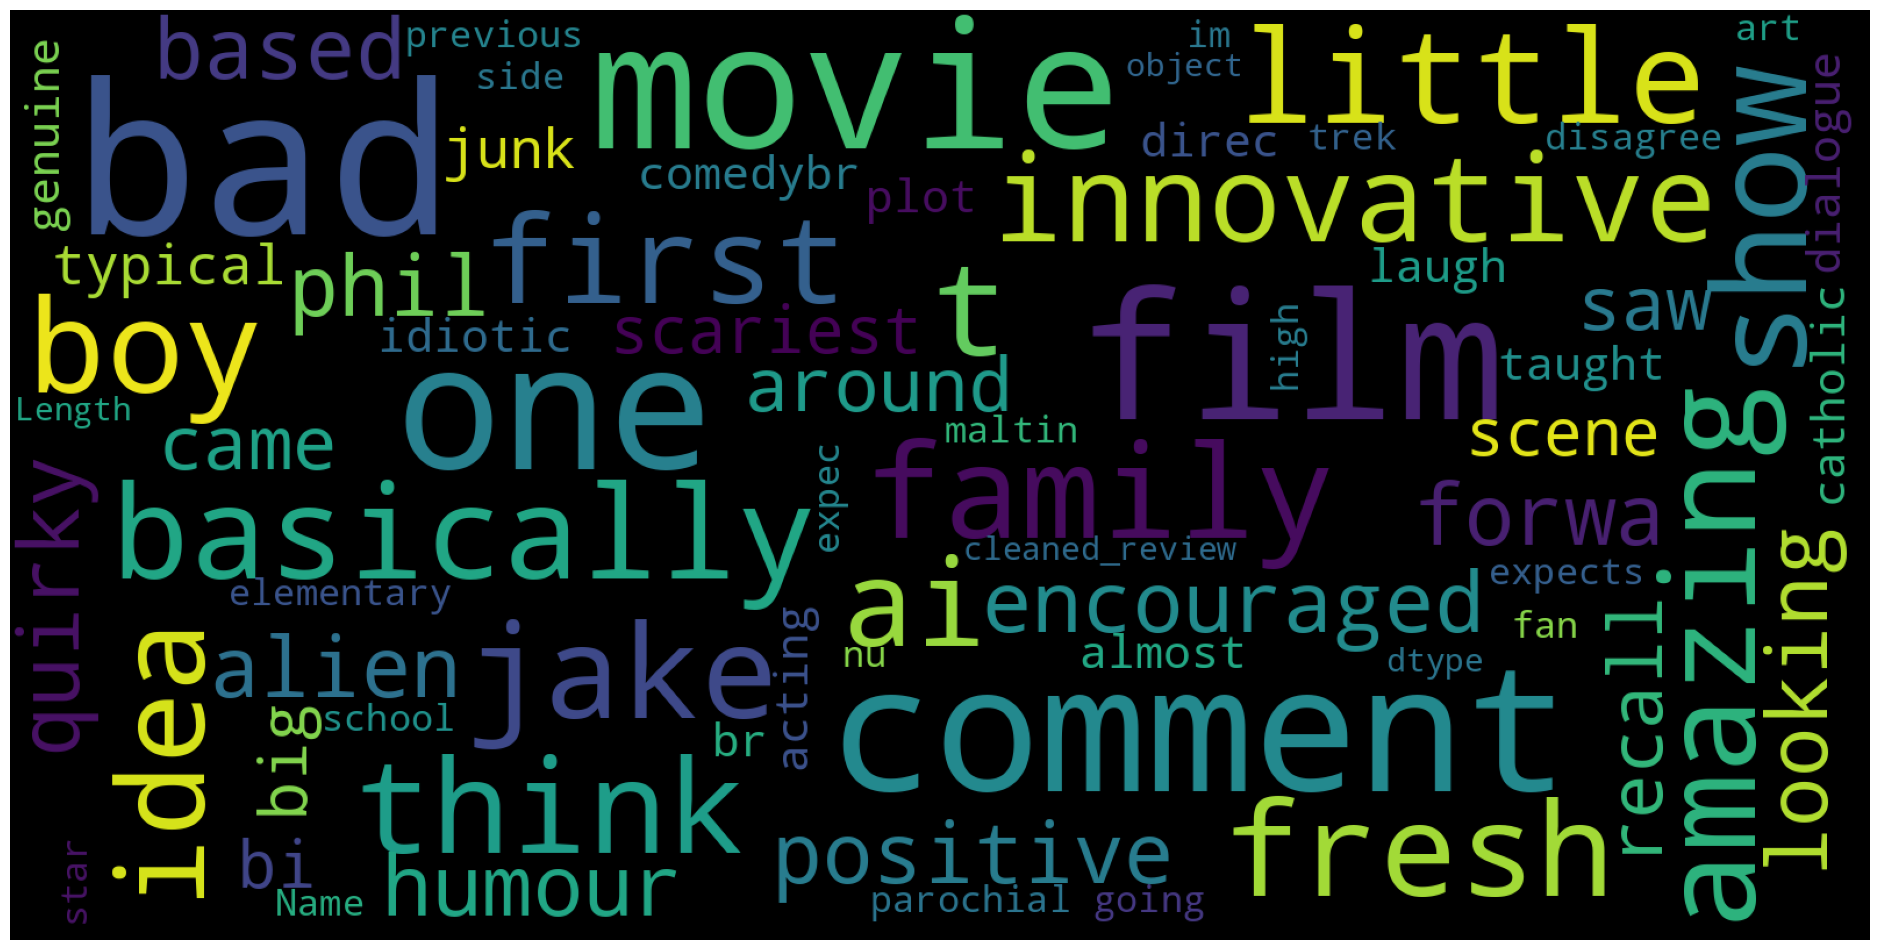

In [ ]:
show_wordcloud(df[df["sentiment"] == "negative"]["cleaned_review"])

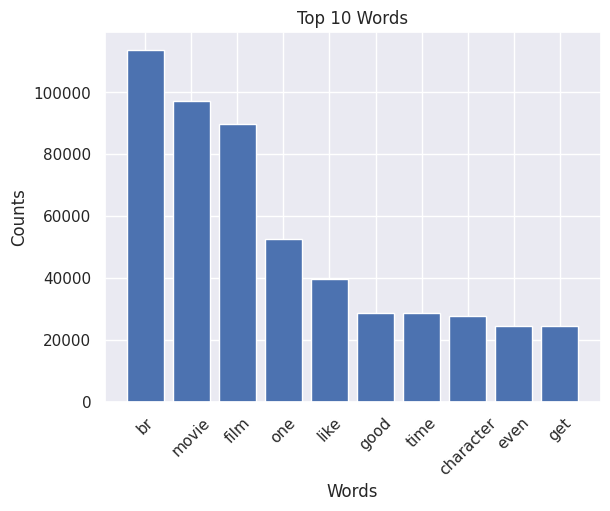

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming the DataFrame column name is 'text_column'
tokenized_words = df['cleaned_review'].str.split().explode()

word_counts = Counter(tokenized_words)
top_10_words = word_counts.most_common(10)

# Extract words and counts separately
words = [word for word, count in top_10_words]
counts = [count for word, count in top_10_words]

# Plotting the histogram
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 10 Words')
plt.xticks(rotation=45)
plt.show()


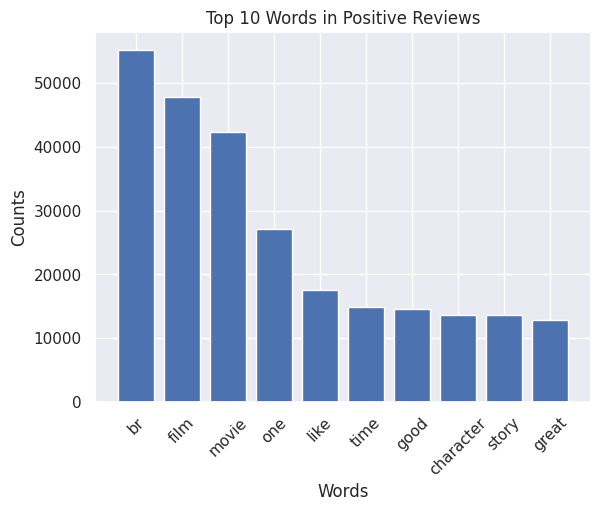

In [ ]:

positive_reviews = df[df['sentiment'] == 'positive']['cleaned_review']

# Tokenize the positive reviews
tokenized_words = positive_reviews.str.split().explode()

word_counts = Counter(tokenized_words)
top_10_words = word_counts.most_common(10)

# Extract words and counts separately
words = [word for word, count in top_10_words]
counts = [count for word, count in top_10_words]

# Plotting the histogram
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 10 Words in Positive Reviews')
plt.xticks(rotation=45)
plt.show()


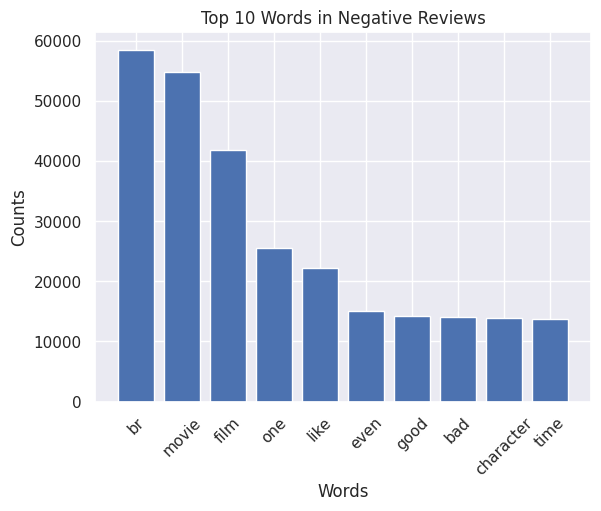

In [ ]:

positive_reviews = df[df['sentiment'] == 'negative']['cleaned_review']

# Tokenize the positive reviews
tokenized_words = positive_reviews.str.split().explode()

word_counts = Counter(tokenized_words)
top_10_words = word_counts.most_common(10)

# Extract words and counts separately
words = [word for word, count in top_10_words]
counts = [count for word, count in top_10_words]

# Plotting the histogram
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top 10 Words in Negative Reviews')
plt.xticks(rotation=45)
plt.show()


#Vectorizing

In [ ]:

# Data integration and transformation
X = df['cleaned_review']

# # Feature extraction using TF-IDF
# tfidf_vectorizer = TfidfVectorizer()
# X_tfidf = tfidf_vectorizer.fit_transform(X)

# # Feature extraction using CountVectorizer
# count_vectorizer = CountVectorizer()
# X_count = count_vectorizer.fit_transform(X)

# # Split the data into train and test sets
# X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=15000, train_size=35000, stratify=y, random_state=42)
# X_train_count, X_test_count, _, _ = train_test_split(X_count, y, test_size=15000, train_size=35000, stratify=y, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
y = df['sentiment'].map({'positive': 1, 'negative': 0})

from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from xgboost import XGBClassifier

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Feature extraction using CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(X)



# Example usage of Word2Vec model

# # Training a classification model using Word2Vec features
# # Assuming you have corresponding y values (labels) in y variable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=15000, train_size=35000, stratify=y, random_state=42)
# X_train_count, X_test_count, _, _ = train_test_split(X_count, y, test_size=15000, train_size=35000, stratify=y, random_state=42)

# # Example logistic regression model training



In [ ]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=15000, train_size=35000, stratify=y, random_state=42)
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=15000, train_size=35000, stratify=y, random_state=42)


In [ ]:

# # # Feature extraction using Word2Vec
# # sentences = [text.split() for text in X]
# # word2vec_model = Word2Vec(sentences, min_count=1)  # Adjust parameters as needed
# sentence_embeddings = []
# for sentence in sentences:
#     word_embeddings = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
#     if word_embeddings:
#         sentence_embeddings.append(sum(word_embeddings) / len(word_embeddings))
#     else:
#         sentence_embeddings.append([0])  # Use zero vector if no valid word embeddings found
# # X_train_word, X_test_word, y_train, y_test = train_test_split(sentence_embeddings, y, test_size=15000, train_size=35000, random_state=42)


In [ ]:

# Logistic Regression
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, y_train)
lr_tfidf_pred = lr_tfidf.predict(X_test_tfidf)


# Calculate metrics for Logistic Regression with TF-IDF
lr_tfidf_precision, lr_tfidf_recall, lr_tfidf_accuracy, lr_tfidf_f1 = calculate_metrics(y_test, lr_tfidf_pred)

print("Logistic Regression - TF-IDF:")
print("Precision:", lr_tfidf_precision)
print("Recall:", lr_tfidf_recall)
print("Accuracy:", lr_tfidf_accuracy)
print("F1 Score:", lr_tfidf_f1)

lr_count = LogisticRegression()
lr_count.fit(X_train_count, y_train)
lr_count_pred = lr_count.predict(X_test_count)


# lr_word = LogisticRegression()
# lr_word.fit(X_train_word, y_train)
# lr_word_pred = lr_word.predict(X_test_word)

# Naive Bayes
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
nb_tfidf_pred = nb_tfidf.predict(X_test_tfidf)

nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
nb_count_pred = nb_count.predict(X_test_count)

# # nb_word = MultinomialNB()
# # nb_word.fit(X_train_word, y_train)
# # nb_word_pred = nb_word.predict(X_test_word)


# # SVM
svm_tfidf = SVC()
svm_tfidf.fit(X_train_tfidf, y_train)
svm_tfidf_pred = svm_tfidf.predict(X_test_tfidf)

svm_count = SVC()
svm_count.fit(X_train_count, y_train)
svm_count_pred = svm_count.predict(X_test_count)



# svm_word = SVC()
# svm_word.fit(X_train_word, y_train)
# svm_word_pred = svm_word.predict(X_test_word)


# XGBoost
xgb_tfidf = XGBClassifier()
xgb_tfidf.fit(X_train_tfidf, y_train)
xgb_tfidf_pred = xgb_tfidf.predict(X_test_tfidf)

xgb_count = XGBClassifier()
xgb_count.fit(X_train_count, y_train)
xgb_count_pred = xgb_count.predict(X_test_count)

# xgb_word = XGBClassifier()
# xgb_word.fit(X_train_word, y_train)
# xgb_word_pred = xgb_word.predict(X_test_word)



# # Random Forest
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train)
rf_tfidf_pred = rf_tfidf.predict(X_test_tfidf)

rf_count = RandomForestClassifier()
rf_count.fit(X_train_count, y_train)
rf_count_pred = rf_count.predict(X_test_count)

# rf_word = RandomForestClassifier()
# rf_word.fit(X_train_word, y_train)
# rf_word_pred = rf_word.predict(X_test_word)



# # Decision Tree
dt_tfidf = DecisionTreeClassifier()
dt_tfidf.fit(X_train_tfidf, y_train)
dt_tfidf_pred = dt_tfidf.predict(X_test_tfidf)

dt_count = DecisionTreeClassifier()
dt_count.fit(X_train_count, y_train)
dt_count_pred = dt_count.predict(X_test_count)



Logistic Regression - TF-IDF:
Precision: 0.8811571540265832
Recall: 0.9016
Accuracy: 0.89
F1 Score: 0.8912613681296955


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# predictions = {
#     'LR TF-IDF': lr_tfidf_pred,
#     'LR Count': lr_count_pred,
#     'LR Word': lr_word_pred,
#     'NB TF-IDF': nb_tfidf_pred,
#     'NB Count': nb_count_pred,
#     'SVM TF-IDF': svm_tfidf_pred,
#     'SVM Count': svm_count_pred,
#     'SVM Word': svm_word_pred,
#     'XGBoost TF-IDF': xgb_tfidf_pred,
#     'XGBoost Count': xgb_count_pred,
#     'XGBoost Word': xgb_word_pred,
#     'RF TF-IDF': rf_tfidf_pred,
#     'RF Count': rf_count_pred,
#     'RF Word': rf_word_pred,
#     'DT TF-IDF': dt_tfidf_pred,
#     'DT Count': dt_count_pred

# }


In [ ]:
# accuracy_list = []
# precision_list = []
# recall_list = []
# f1_list = []

# for model, prediction in predictions.items():
#     accuracy_list.append(accuracy_score(y_test, prediction))
#     precision_list.append(precision_score(y_test, prediction))
#     recall_list.append(recall_score(y_test, prediction))
#     f1_list.append(f1_score(y_test, prediction))

# # Plotting the bar graphs


NameError: ignored

In [ ]:
# lr_word_precision, lr_word_recall, lr_word_accuracy, lr_word_f1 = calculate_metrics(y_test, lr_word_pred)


In [ ]:
print("Logistic Regression - CountVectorizer:")
print("Precision:", lr_word_precision)
print("Recall:", lr_word_recall)
print("Accuracy:", lr_word_accuracy)
print("F1 Score:", lr_word_f1)



In [33]:
def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, recall, accuracy, f1

# Calculate metrics for Logistic Regression with TF-IDF
lr_tfidf_precision, lr_tfidf_recall, lr_tfidf_accuracy, lr_tfidf_f1 = calculate_metrics(y_test, lr_tfidf_pred)

# Calculate metrics for Logistic Regression with CountVectorizer
lr_count_precision, lr_count_recall, lr_count_accuracy, lr_count_f1 = calculate_metrics(y_test, lr_count_pred)

# Calculate metrics for Naive Bayes with TF-IDF
nb_tfidf_precision, nb_tfidf_recall, nb_tfidf_accuracy, nb_tfidf_f1 = calculate_metrics(y_test, nb_tfidf_pred)

# Calculate metrics for Naive Bayes with CountVectorizer
nb_count_precision, nb_count_recall, nb_count_accuracy, nb_count_f1 = calculate_metrics(y_test, nb_count_pred)

# Calculate metrics for SVM with TF-IDF
svm_tfidf_precision, svm_tfidf_recall, svm_tfidf_accuracy, svm_tfidf_f1 = calculate_metrics(y_test, svm_tfidf_pred)

# Calculate metrics for SVM with CountVectorizer
svm_count_precision, svm_count_recall, svm_count_accuracy, svm_count_f1 = calculate_metrics(y_test, svm_count_pred)

# Calculate metrics for XGBoost with TF-IDF
xgb_tfidf_precision, xgb_tfidf_recall, xgb_tfidf_accuracy, xgb_tfidf_f1 = calculate_metrics(y_test, xgb_tfidf_pred)

# Calculate metrics for XGBoost with CountVectorizer
xgb_count_precision, xgb_count_recall, xgb_count_accuracy, xgb_count_f1 = calculate_metrics(y_test, xgb_count_pred)

rf_tfidf_precision, rf_tfidf_recall, rf_tfidf_accuracy, rf_tfidf_f1 = calculate_metrics(y_test, rf_tfidf_pred)

rf_count_precision, rf_count_recall, rf_count_accuracy, rf_count_f1 = calculate_metrics(y_test, rf_count_pred)

dt_tfidf_precision, dt_tfidf_recall, dt_tfidf_accuracy, dt_tfidf_f1 = calculate_metrics(y_test, dt_tfidf_pred)

dt_count_precision, dt_count_recall, dt_count_accuracy, dt_count_f1 = calculate_metrics(y_test, dt_count_pred)


# Print the metrics
print("Logistic Regression - TF-IDF:")
print("Precision:", lr_tfidf_precision) 
print("Recall:", lr_tfidf_recall)
print("Accuracy:", lr_tfidf_accuracy)
print("F1 Score:", lr_tfidf_f1)

print("Logistic Regression - CountVectorizer:")
print("Precision:", lr_count_precision)
print("Recall:", lr_count_recall)
print("Accuracy:", lr_count_accuracy)
print("F1 Score:", lr_count_f1)

print("Naive Bayes - TF-IDF:")
print("Precision:", nb_tfidf_precision)
print("Recall:", nb_tfidf_recall)
print("Accuracy:", nb_tfidf_accuracy)
print("F1 Score:", nb_tfidf_f1)

print("Naive Bayes - CountVectorizer:")
print("Precision:", nb_count_precision)
print("Recall:", nb_count_recall)
print("Accuracy:", nb_count_accuracy)
print("F1 Score:", nb_count_f1)

print("SVM - TF-IDF:")
print("Precision:", svm_tfidf_precision)
print("Recall:", svm_tfidf_recall)
print("Accuracy:", svm_tfidf_accuracy)
print("F1 Score:", svm_tfidf_f1)

print("SVM - CountVectorizer:")
print("Precision:", svm_count_precision)
print("Recall:", svm_count_recall)
print("Accuracy:", svm_count_accuracy)
print("F1 Score:", svm_count_f1)

print("XGBoost - TF-IDF:")
print("Precision:", xgb_tfidf_precision)
print("Recall:", xgb_tfidf_recall)
print("Accuracy:", xgb_tfidf_accuracy)
print("F1 Score:", xgb_tfidf_f1)

print("XGBoost - CountVectorizer:")
print("Precision:", xgb_count_precision)
print("Recall:", xgb_count_recall)
print("Accuracy:", xgb_count_accuracy)
print("F1 Score:", xgb_count_f1)

print("Random Forest - CountVectorizer:")
print("Precision:", rf_count_precision)
print("Recall:", rf_count_recall)
print("Accuracy:", rf_count_accuracy)
print("F1 Score:", rf_count_f1)

print("Random Forest - TF-IDF:")
print("Precision:", rf_tfidf_precision)
print("Recall:", rf_tfidf_recall)
print("Accuracy:", rf_tfidf_accuracy)
print("F1 Score:", rf_tfidf_f1)


print("Decision Tree - CountVectorizer:")
print("Precision:", dt_count_precision)
print("Recall:", dt_count_recall)
print("Accuracy:", dt_count_accuracy)
print("F1 Score:", dt_count_f1)

print("Decision Tree - TF-IDF:")
print("Precision:", dt_tfidf_precision)
print("Recall:", dt_tfidf_recall)
print("Accuracy:", dt_tfidf_accuracy)
print("F1 Score:", dt_tfidf_f1)


Logistic Regression - TF-IDF:
Precision: 0.8811571540265832
Recall: 0.9016
Accuracy: 0.89
F1 Score: 0.8912613681296955
Logistic Regression - CountVectorizer:
Precision: 0.8851959745762712
Recall: 0.8913333333333333
Accuracy: 0.8878666666666667
F1 Score: 0.8882540526175924
Naive Bayes - TF-IDF:
Precision: 0.8770164070039983
Recall: 0.8481333333333333
Accuracy: 0.8646
F1 Score: 0.8623330847963125
Naive Bayes - CountVectorizer:
Precision: 0.8692477266464591
Recall: 0.8412
Accuracy: 0.8573333333333333
F1 Score: 0.8549939016126846
SVM - TF-IDF:
Precision: 0.8873458792991564
Recall: 0.9116
Accuracy: 0.8979333333333334
F1 Score: 0.899309437684972
SVM - CountVectorizer:
Precision: 0.8615188257817485
Recall: 0.9
Accuracy: 0.8776666666666667
F1 Score: 0.8803390935767852
XGBoost - TF-IDF:
Precision: 0.8395852003584688
Recall: 0.8744
Accuracy: 0.8536666666666667
F1 Score: 0.8566390176996931
XGBoost - CountVectorizer:
Precision: 0.8512919896640827
Recall: 0.8785333333333334
Accuracy: 0.862533333333

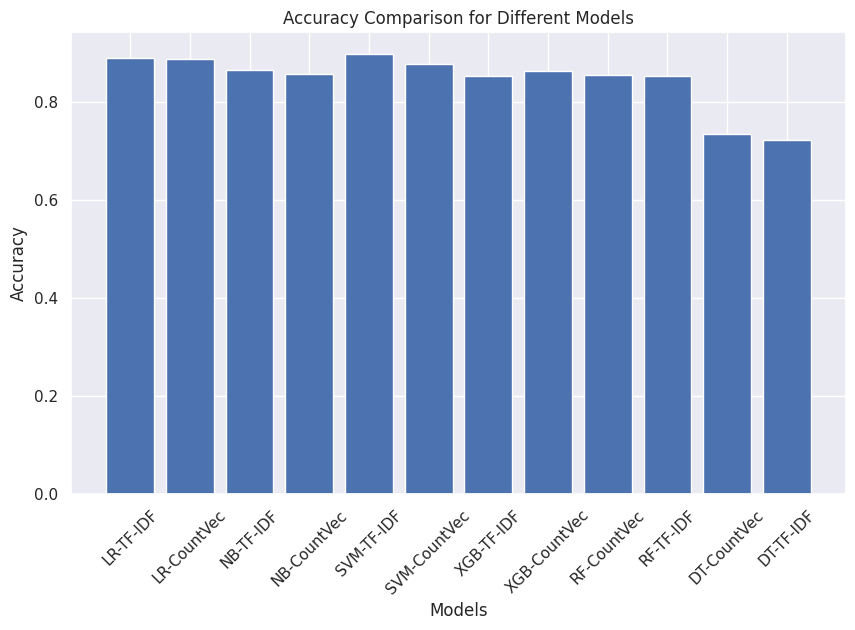

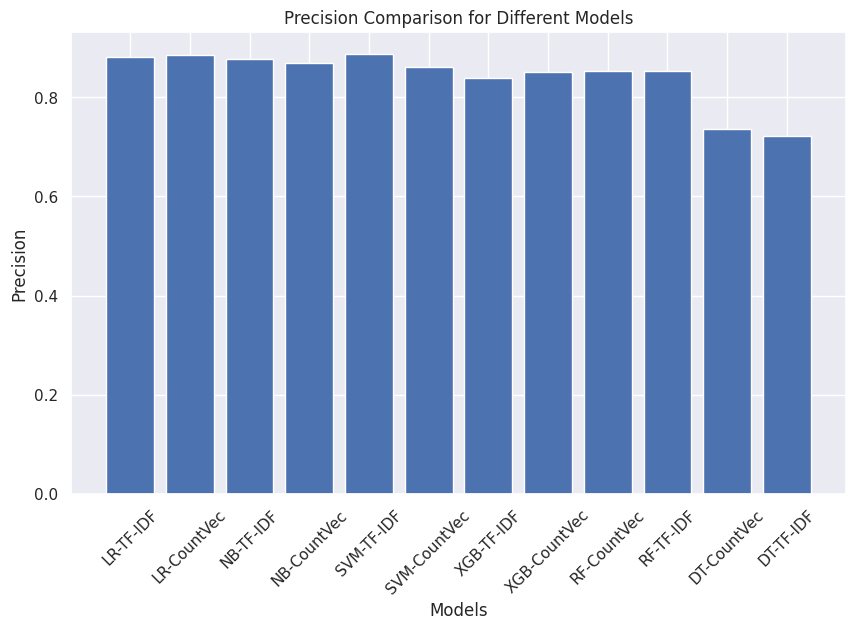

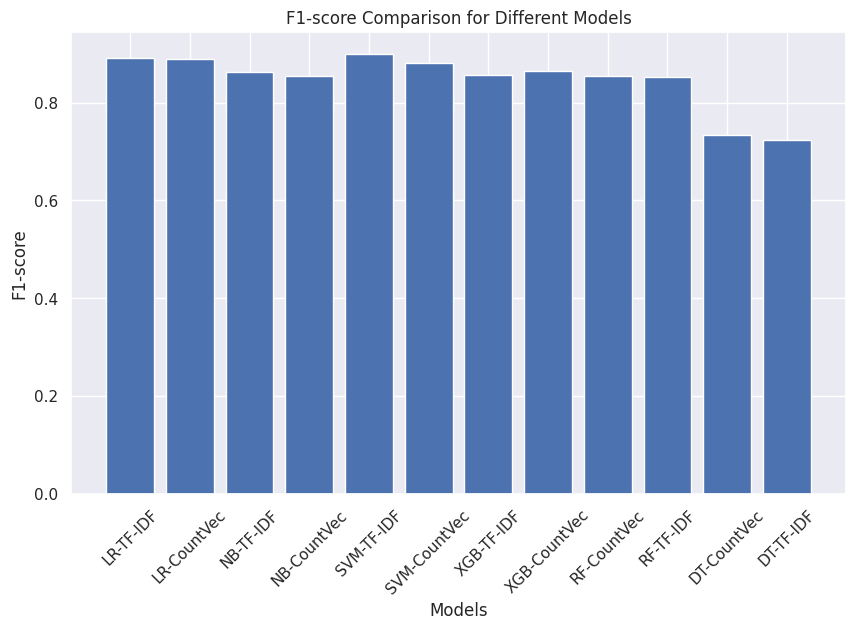

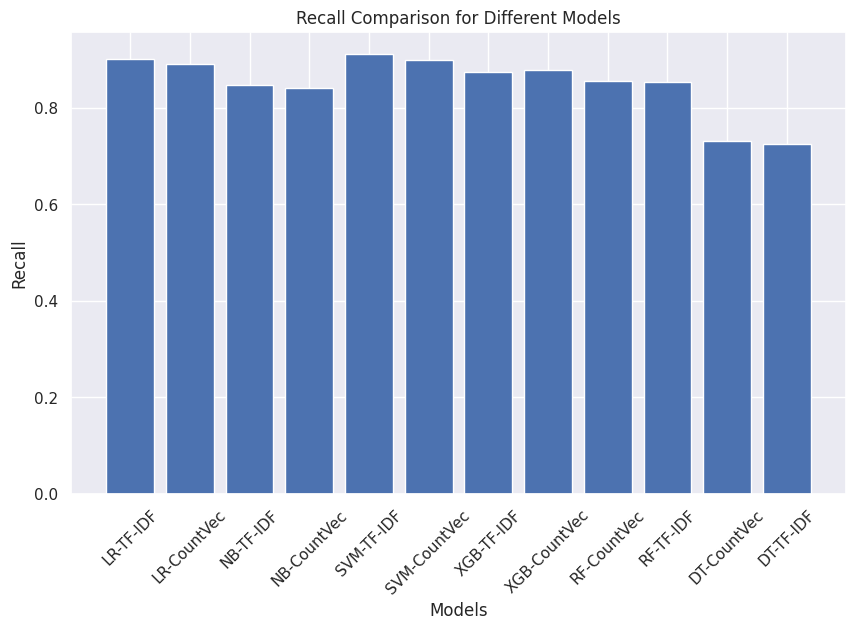

In [34]:

import matplotlib.pyplot as plt

# Define empty lists for each metric
accuracy_list = []
precision_list = []
f1score_list = []
recall_list = []

# Logistic Regression - TF-IDF
lr_tfidf_precision, lr_tfidf_recall, lr_tfidf_accuracy, lr_tfidf_f1 = calculate_metrics(y_test, lr_tfidf_pred)
accuracy_list.append(lr_tfidf_accuracy)
precision_list.append(lr_tfidf_precision)
f1score_list.append(lr_tfidf_f1)
recall_list.append(lr_tfidf_recall)

# Logistic Regression - CountVectorizer
lr_count_precision, lr_count_recall, lr_count_accuracy, lr_count_f1 = calculate_metrics(y_test, lr_count_pred)
accuracy_list.append(lr_count_accuracy)
precision_list.append(lr_count_precision)
f1score_list.append(lr_count_f1)
recall_list.append(lr_count_recall)

# Naive Bayes - TF-IDF
nb_tfidf_precision, nb_tfidf_recall, nb_tfidf_accuracy, nb_tfidf_f1 = calculate_metrics(y_test, nb_tfidf_pred)
accuracy_list.append(nb_tfidf_accuracy)
precision_list.append(nb_tfidf_precision)
f1score_list.append(nb_tfidf_f1)
recall_list.append(nb_tfidf_recall)

# Naive Bayes - CountVectorizer
nb_count_precision, nb_count_recall, nb_count_accuracy, nb_count_f1 = calculate_metrics(y_test, nb_count_pred)
accuracy_list.append(nb_count_accuracy)
precision_list.append(nb_count_precision)
f1score_list.append(nb_count_f1)
recall_list.append(nb_count_recall)

# SVM - TF-IDF
svm_tfidf_precision, svm_tfidf_recall, svm_tfidf_accuracy, svm_tfidf_f1 = calculate_metrics(y_test, svm_tfidf_pred)
accuracy_list.append(svm_tfidf_accuracy)
precision_list.append(svm_tfidf_precision)
f1score_list.append(svm_tfidf_f1)
recall_list.append(svm_tfidf_recall)

# SVM - CountVectorizer
svm_count_precision, svm_count_recall, svm_count_accuracy, svm_count_f1 = calculate_metrics(y_test, svm_count_pred)
accuracy_list.append(svm_count_accuracy)
precision_list.append(svm_count_precision)
f1score_list.append(svm_count_f1)
recall_list.append(svm_count_recall)

# XGBoost - TF-IDF
xgb_tfidf_precision, xgb_tfidf_recall, xgb_tfidf_accuracy, xgb_tfidf_f1 = calculate_metrics(y_test, xgb_tfidf_pred)
accuracy_list.append(xgb_tfidf_accuracy)
precision_list.append(xgb_tfidf_precision)
f1score_list.append(xgb_tfidf_f1)
recall_list.append(xgb_tfidf_recall)

# XGBoost - CountVectorizer
xgb_count_precision, xgb_count_recall, xgb_count_accuracy, xgb_count_f1 = calculate_metrics(y_test, xgb_count_pred)
accuracy_list.append(xgb_count_accuracy)
precision_list.append(xgb_count_precision)
f1score_list.append(xgb_count_f1)
recall_list.append(xgb_count_recall)

# Random Forest - CountVectorizer
rf_count_precision, rf_count_recall, rf_count_accuracy, rf_count_f1 = calculate_metrics(y_test, rf_count_pred)
accuracy_list.append(rf_count_accuracy)
precision_list.append(rf_count_precision)
f1score_list.append(rf_count_f1)
recall_list.append(rf_count_recall)



# Random Forest - TF-IDF
rf_tfidf_precision, rf_tfidf_recall, rf_tfidf_accuracy, rf_tfidf_f1 = calculate_metrics(y_test, rf_tfidf_pred)
accuracy_list.append(rf_tfidf_accuracy)
precision_list.append(rf_tfidf_precision)
f1score_list.append(rf_tfidf_f1)
recall_list.append(rf_tfidf_recall)

# Decision Tree - CountVectorizer
dt_count_precision, dt_count_recall, dt_count_accuracy, dt_count_f1 = calculate_metrics(y_test, dt_count_pred)
accuracy_list.append(dt_count_accuracy)
precision_list.append(dt_count_precision)
f1score_list.append(dt_count_f1)
recall_list.append(dt_count_recall)

# Decision Tree - TF-IDF
dt_tfidf_precision, dt_tfidf_recall, dt_tfidf_accuracy, dt_tfidf_f1 = calculate_metrics(y_test, dt_tfidf_pred)
accuracy_list.append(dt_tfidf_accuracy)
precision_list.append(dt_tfidf_precision)
f1score_list.append(dt_tfidf_f1)
recall_list.append(dt_tfidf_recall)

# Bar graph for accuracy
plt.figure(figsize=(10, 6))
models = ['LR-TF-IDF', 'LR-CountVec', 'NB-TF-IDF', 'NB-CountVec', 'SVM-TF-IDF', 'SVM-CountVec', 'XGB-TF-IDF', 'XGB-CountVec', 'RF-CountVec', 'RF-TF-IDF', 'DT-CountVec', 'DT-TF-IDF']
plt.bar(models, accuracy_list)
plt.title('Accuracy Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Bar graph for precision
plt.figure(figsize=(10, 6))
plt.bar(models, precision_list)
plt.title('Precision Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()

# Bar graph for F1-score
plt.figure(figsize=(10, 6))
plt.bar(models, f1score_list)
plt.title('F1-score Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.show()

# Bar graph for recall
plt.figure(figsize=(10, 6))
plt.bar(models, recall_list)
plt.title('Recall Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()



In [ ]:
def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, recall, accuracy, f1


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, model_name, vectorizer_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name} ({vectorizer_name})')
    plt.legend(loc="lower right")
    plt.show()

# Logistic Regression - TF-IDF
lr_tfidf_fpr, lr_tfidf_tpr, _ = roc_curve(y_test, lr_tfidf_pred)
lr_tfidf_auc = auc(lr_tfidf_fpr, lr_tfidf_tpr)
plot_roc_curve(lr_tfidf_fpr, lr_tfidf_tpr, "Logistic Regression", "TF-IDF")
print("AUC (Logistic Regression - TF-IDF):", lr_tfidf_auc)

# Logistic Regression - CountVectorizer
lr_count_fpr, lr_count_tpr, _ = roc_curve(y_test, lr_count_pred)
lr_count_auc = auc(lr_count_fpr, lr_count_tpr)
plot_roc_curve(lr_count_fpr, lr_count_tpr, "Logistic Regression", "CountVectorizer")
print("AUC (Logistic Regression - CountVectorizer):", lr_count_auc)

# Naive Bayes - TF-IDF
nb_tfidf_fpr, nb_tfidf_tpr, _ = roc_curve(y_test, nb_tfidf_pred)
nb_tfidf_auc = auc(nb_tfidf_fpr, nb_tfidf_tpr)
plot_roc_curve(nb_tfidf_fpr, nb_tfidf_tpr, "Naive Bayes", "TF-IDF")
print("AUC (Naive Bayes - TF-IDF):", nb_tfidf_auc)

# Naive Bayes - CountVectorizer
nb_count_fpr, nb_count_tpr, _ = roc_curve(y_test, nb_count_pred)
nb_count_auc = auc(nb_count_fpr, nb_count_tpr)
plot_roc_curve(nb_count_fpr, nb_count_tpr, "Naive Bayes", "CountVectorizer")
print("AUC (Naive Bayes - CountVectorizer):", nb_count_auc)

# SVM - TF-IDF
svm_tfidf_fpr, svm_tfidf_tpr, _ = roc_curve(y_test, svm_tfidf_pred)
svm_tfidf_auc = auc(svm_tfidf_fpr, svm_tfidf_tpr)
plot_roc_curve(svm_tfidf_fpr, svm_tfidf_tpr, "SVM", "TF-IDF")
print("AUC (SVM - TF-IDF):", svm_tfidf_auc)

# SVM - CountVectorizer
svm_count_fpr, svm_count_tpr, _ = roc_curve(y_test, svm_count_pred)
svm_count_auc = auc(svm_count_fpr, svm_count_tpr)
plot_roc_curve(svm_count_fpr, svm_count_tpr, "SVM", "CountVectorizer")
print("AUC (SVM - CountVectorizer):", svm_count_auc)

# XGBoost - TF-IDF
xgb_tfidf_fpr, xgb_tfidf_tpr, _ = roc_curve(y_test, xgb_tfidf_pred)
xgb_tfidf_auc = auc(xgb_tfidf_fpr, xgb_tfidf_tpr)
plot_roc_curve(xgb_tfidf_fpr, xgb_tfidf_tpr, "XGBoost", "TF-IDF")
print("AUC (XGBoost - TF-IDF):", xgb_tfidf_auc)

# XGBoost - CountVectorizer
xgb_count_fpr, xgb_count_tpr, _ = roc_curve(y_test, xgb_count_pred)
xgb_count_auc = auc(xgb_count_fpr, xgb_count_tpr)
plot_roc_curve(xgb_count_fpr, xgb_count_tpr, "XGBoost", "CountVectorizer")
print("AUC (XGBoost - CountVectorizer):", xgb_count_auc)

# Random Forest - TF-IDF
rf_tfidf_fpr, rf_tfidf_tpr, _ = roc_curve(y_test, rf_tfidf_pred)
rf_tfidf_auc = auc(rf_tfidf_fpr, rf_tfidf_tpr)
plot_roc_curve(rf_tfidf_fpr, rf_tfidf_tpr, "Random Forest", "TF-IDF")
print("AUC (Random Forest - TF-IDF):", rf_tfidf_auc)

# Random Forest - CountVectorizer
rf_count_fpr, rf_count_tpr, _ = roc_curve(y_test, rf_count_pred)
rf_count_auc = auc(rf_count_fpr, rf_count_tpr)
plot_roc_curve(rf_count_fpr, rf_count_tpr, "Random Forest", "CountVectorizer")
print("AUC (Random Forest - CountVectorizer):", rf_count_auc)

# Decision Tree - TF-IDF
dt_tfidf_fpr, dt_tfidf_tpr, _ = roc_curve(y_test, dt_tfidf_pred)
dt_tfidf_auc = auc(dt_tfidf_fpr, dt_tfidf_tpr)
plot_roc_curve(dt_tfidf_fpr, dt_tfidf_tpr, "Decision Tree", "TF-IDF")
print("AUC (Decision Tree - TF-IDF):", dt_tfidf_auc)

# Decision Tree - CountVectorizer
dt_count_fpr, dt_count_tpr, _ = roc_curve(y_test, dt_count_pred)
dt_count_auc = auc(dt_count_fpr, dt_count_tpr)
plot_roc_curve(dt_count_fpr, dt_count_tpr, "Decision Tree", "CountVectorizer")
print("AUC (Decision Tree - CountVectorizer):", dt_count_auc)



# CNN

In [38]:
import pickle

# Assuming you have trained and obtained the SVM TF-IDF model: svm_tfidf_model

# Save the model to a file
with open('svm_tfidf_model.pkl', 'wb') as file:
    pickle.dump(svm_tfidf, file)


In [39]:
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)

In [46]:
df_critic = pd.read_csv('/content/rotten_tomatoes_critic_reviews.csv')


In [47]:
df_critic

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
...,...,...,...,...,...,...,...,...
1130012,m/zulu_dawn,Chuck O'Leary,False,Fantastica Daily,Rotten,2/5,2005-11-02,NaN
1130013,m/zulu_dawn,Ken Hanke,False,"Mountain Xpress (Asheville, NC)",Fresh,3.5/5,2007-03-07,"Seen today, it's not only a startling indictme..."
1130014,m/zulu_dawn,Dennis Schwartz,False,Dennis Schwartz Movie Reviews,Fresh,B+,2010-09-16,A rousing visual spectacle that's a prequel of...
1130015,m/zulu_dawn,Christopher Lloyd,False,Sarasota Herald-Tribune,Rotten,3.5/5,2011-02-28,"A simple two-act story: Prelude to war, and th..."


In [48]:
df_critic = df_critic.dropna()

In [49]:
df = df_critic[['review_content', 'review_type']].copy()


In [50]:
df

,review_content,review_type
3,Whether audiences will get behind The Lightnin...,Fresh
6,Harry Potter knockoffs don't come more transpa...,Rotten
7,"Percy Jackson isn't a great movie, but it's a ...",Fresh
8,"Fun, brisk and imaginative",Fresh
9,"Crammed with dragons, set-destroying fights an...",Fresh
...,...,...
1130004,The movie is a revelation.,Fresh
1130013,"Seen today, it's not only a startling indictme...",Fresh
1130014,A rousing visual spectacle that's a prequel of...,Fresh
1130015,"A simple two-act story: Prelude to war, and th...",Rotten


In [51]:
y = df['review_type'].map({'Fresh': 1, 'Rotten': 0})
X = df['review_content']
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from xgboost import XGBClassifier

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Feature extraction using CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(X)



# Example usage of Word2Vec model

# # Training a classification model using Word2Vec features
# # Assuming you have corresponding y values (labels) in y variable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=15000, train_size=35000, stratify=y, random_state=42)
# X_train_count, X_test_count, _, _ = train_test_split(X_count, y, test_size=15000, train_size=35000, stratify=y, random_state=42)

# # Example logistic regression model training

X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=15000, train_size=35000, stratify=y, random_state=42)
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, y, test_size=15000, train_size=35000, stratify=y, random_state=42)


# Logistic Regression
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, y_train)
lr_tfidf_pred = lr_tfidf.predict(X_test_tfidf)


# Calculate metrics for Logistic Regression with TF-IDF
lr_tfidf_precision, lr_tfidf_recall, lr_tfidf_accuracy, lr_tfidf_f1 = calculate_metrics(y_test, lr_tfidf_pred)

print("Logistic Regression - TF-IDF:")
print("Precision:", lr_tfidf_precision)
print("Recall:", lr_tfidf_recall)
print("Accuracy:", lr_tfidf_accuracy)
print("F1 Score:", lr_tfidf_f1)

lr_count = LogisticRegression()
lr_count.fit(X_train_count, y_train)
lr_count_pred = lr_count.predict(X_test_count)


# lr_word = LogisticRegression()
# lr_word.fit(X_train_word, y_train)
# lr_word_pred = lr_word.predict(X_test_word)

# Naive Bayes
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
nb_tfidf_pred = nb_tfidf.predict(X_test_tfidf)

nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
nb_count_pred = nb_count.predict(X_test_count)

# # nb_word = MultinomialNB()
# # nb_word.fit(X_train_word, y_train)
# # nb_word_pred = nb_word.predict(X_test_word)


# # SVM
svm_tfidf = SVC()
svm_tfidf.fit(X_train_tfidf, y_train)
svm_tfidf_pred = svm_tfidf.predict(X_test_tfidf)

svm_count = SVC()
svm_count.fit(X_train_count, y_train)
svm_count_pred = svm_count.predict(X_test_count)



# svm_word = SVC()
# svm_word.fit(X_train_word, y_train)
# svm_word_pred = svm_word.predict(X_test_word)


# XGBoost
xgb_tfidf = XGBClassifier()
xgb_tfidf.fit(X_train_tfidf, y_train)
xgb_tfidf_pred = xgb_tfidf.predict(X_test_tfidf)

xgb_count = XGBClassifier()
xgb_count.fit(X_train_count, y_train)
xgb_count_pred = xgb_count.predict(X_test_count)

# xgb_word = XGBClassifier()
# xgb_word.fit(X_train_word, y_train)
# xgb_word_pred = xgb_word.predict(X_test_word)



# # Random Forest
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train)
rf_tfidf_pred = rf_tfidf.predict(X_test_tfidf)

rf_count = RandomForestClassifier()
rf_count.fit(X_train_count, y_train)
rf_count_pred = rf_count.predict(X_test_count)

# rf_word = RandomForestClassifier()
# rf_word.fit(X_train_word, y_train)
# rf_word_pred = rf_word.predict(X_test_word)



# # Decision Tree
dt_tfidf = DecisionTreeClassifier()
dt_tfidf.fit(X_train_tfidf, y_train)
dt_tfidf_pred = dt_tfidf.predict(X_test_tfidf)

dt_count = DecisionTreeClassifier()
dt_count.fit(X_train_count, y_train)
dt_count_pred = dt_count.predict(X_test_count)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - TF-IDF:
Precision: 0.7829175013658715
Recall: 0.898714330511132
Accuracy: 0.7764666666666666
F1 Score: 0.8368290427758042


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, recall, accuracy, f1

# Calculate metrics for Logistic Regression with TF-IDF
lr_tfidf_precision, lr_tfidf_recall, lr_tfidf_accuracy, lr_tfidf_f1 = calculate_metrics(y_test, lr_tfidf_pred)

# Calculate metrics for Logistic Regression with CountVectorizer
lr_count_precision, lr_count_recall, lr_count_accuracy, lr_count_f1 = calculate_metrics(y_test, lr_count_pred)

# Calculate metrics for Naive Bayes with TF-IDF
nb_tfidf_precision, nb_tfidf_recall, nb_tfidf_accuracy, nb_tfidf_f1 = calculate_metrics(y_test, nb_tfidf_pred)

# Calculate metrics for Naive Bayes with CountVectorizer
nb_count_precision, nb_count_recall, nb_count_accuracy, nb_count_f1 = calculate_metrics(y_test, nb_count_pred)

# Calculate metrics for SVM with TF-IDF
svm_tfidf_precision, svm_tfidf_recall, svm_tfidf_accuracy, svm_tfidf_f1 = calculate_metrics(y_test, svm_tfidf_pred)

# Calculate metrics for SVM with CountVectorizer
svm_count_precision, svm_count_recall, svm_count_accuracy, svm_count_f1 = calculate_metrics(y_test, svm_count_pred)

# Calculate metrics for XGBoost with TF-IDF
xgb_tfidf_precision, xgb_tfidf_recall, xgb_tfidf_accuracy, xgb_tfidf_f1 = calculate_metrics(y_test, xgb_tfidf_pred)

# Calculate metrics for XGBoost with CountVectorizer
xgb_count_precision, xgb_count_recall, xgb_count_accuracy, xgb_count_f1 = calculate_metrics(y_test, xgb_count_pred)

rf_tfidf_precision, rf_tfidf_recall, rf_tfidf_accuracy, rf_tfidf_f1 = calculate_metrics(y_test, rf_tfidf_pred)

rf_count_precision, rf_count_recall, rf_count_accuracy, rf_count_f1 = calculate_metrics(y_test, rf_count_pred)

dt_tfidf_precision, dt_tfidf_recall, dt_tfidf_accuracy, dt_tfidf_f1 = calculate_metrics(y_test, dt_tfidf_pred)

dt_count_precision, dt_count_recall, dt_count_accuracy, dt_count_f1 = calculate_metrics(y_test, dt_count_pred)


# Print the metrics
print("Logistic Regression - TF-IDF(Rotten Tomatoes)")
print("Precision:", lr_tfidf_precision)
print("Recall:", lr_tfidf_recall)
print("Accuracy:", lr_tfidf_accuracy)
print("F1 Score:", lr_tfidf_f1)

print("Logistic Regression - CountVectorizer(Rotten Tomatoes)")
print("Precision:", lr_count_precision)
print("Recall:", lr_count_recall)
print("Accuracy:", lr_count_accuracy)
print("F1 Score:", lr_count_f1)

print("Naive Bayes - TF-IDF(Rotten Tomatoes)")
print("Precision:", nb_tfidf_precision)
print("Recall:", nb_tfidf_recall)
print("Accuracy:", nb_tfidf_accuracy)
print("F1 Score:", nb_tfidf_f1)

print("Naive Bayes - CountVectorizer(Rotten Tomatoes)")
print("Precision:", nb_count_precision)
print("Recall:", nb_count_recall)
print("Accuracy:", nb_count_accuracy)
print("F1 Score:", nb_count_f1)

print("SVM - TF-IDF(Rotten Tomatoes)")
print("Precision:", svm_tfidf_precision)
print("Recall:", svm_tfidf_recall)
print("Accuracy:", svm_tfidf_accuracy)
print("F1 Score:", svm_tfidf_f1)

print("SVM - CountVectorizer(Rotten Tomatoes)")
print("Precision:", svm_count_precision)
print("Recall:", svm_count_recall)
print("Accuracy:", svm_count_accuracy)
print("F1 Score:", svm_count_f1)

print("XGBoost - TF-IDF(Rotten Tomatoes)")
print("Precision:", xgb_tfidf_precision)
print("Recall:", xgb_tfidf_recall)
print("Accuracy:", xgb_tfidf_accuracy)
print("F1 Score:", xgb_tfidf_f1)

print("XGBoost - CountVectorizer(Rotten Tomatoes)")
print("Precision:", xgb_count_precision)
print("Recall:", xgb_count_recall)
print("Accuracy:", xgb_count_accuracy)
print("F1 Score:", xgb_count_f1)

print("Random Forest - CountVectorizer(Rotten Tomatoes)")
print("Precision:", rf_count_precision)
print("Recall:", rf_count_recall)
print("Accuracy:", rf_count_accuracy)
print("F1 Score:", rf_count_f1)

print("Random Forest - TF-IDF(Rotten Tomatoes)")
print("Precision:", rf_tfidf_precision)
print("Recall:", rf_tfidf_recall)
print("Accuracy:", rf_tfidf_accuracy)
print("F1 Score:", rf_tfidf_f1)


print("Decision Tree - CountVectorizer(Rotten Tomatoes)")
print("Precision:", dt_count_precision)
print("Recall:", dt_count_recall)
print("Accuracy:", dt_count_accuracy)
print("F1 Score:", dt_count_f1)

print("Decision Tree - TF-IDF(Rotten Tomatoes)")
print("Precision:", dt_tfidf_precision)
print("Recall:", dt_tfidf_recall)
print("Accuracy:", dt_tfidf_accuracy)
print("F1 Score:", dt_tfidf_f1)


Logistic Regression - TF-IDF(Rotten Tomatoes)
Precision: 0.7829175013658715
Recall: 0.898714330511132
Accuracy: 0.7764666666666666
F1 Score: 0.8368290427758042
Logistic Regression - CountVectorizer(Rotten Tomatoes)
Precision: 0.8068890428585569
Recall: 0.8520957457928295
Accuracy: 0.7756
F1 Score: 0.8288764616166753
Naive Bayes - TF-IDF(Rotten Tomatoes)
Precision: 0.6562671797691039
Recall: 0.9982230584300199
Accuracy: 0.6654
F1 Score: 0.7919067954724491
Naive Bayes - CountVectorizer(Rotten Tomatoes)
Precision: 0.7406678152432521
Recall: 0.9436604996341591
Accuracy: 0.7533333333333333
F1 Score: 0.8299319727891157
SVM - TF-IDF(Rotten Tomatoes)
Precision: 0.7833257816039874
Recall: 0.9035225253475488
Accuracy: 0.7790666666666667
F1 Score: 0.8391418308902049
SVM - CountVectorizer(Rotten Tomatoes)
Precision: 0.766228031440431
Recall: 0.9068673565380997
Accuracy: 0.7641333333333333
F1 Score: 0.8306366682623265
XGBoost - TF-IDF(Rotten Tomatoes)
Precision: 0.7195541714473037
Recall: 0.9177380

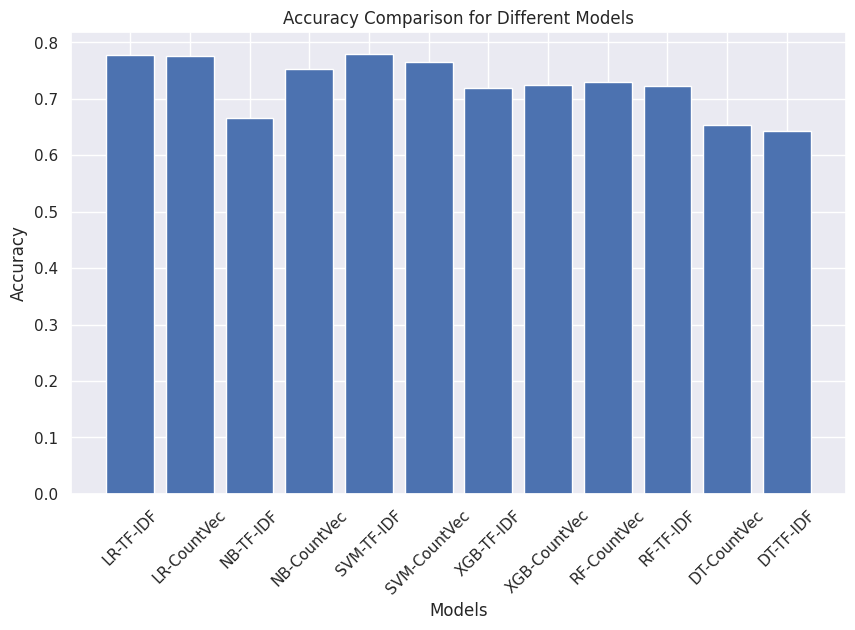

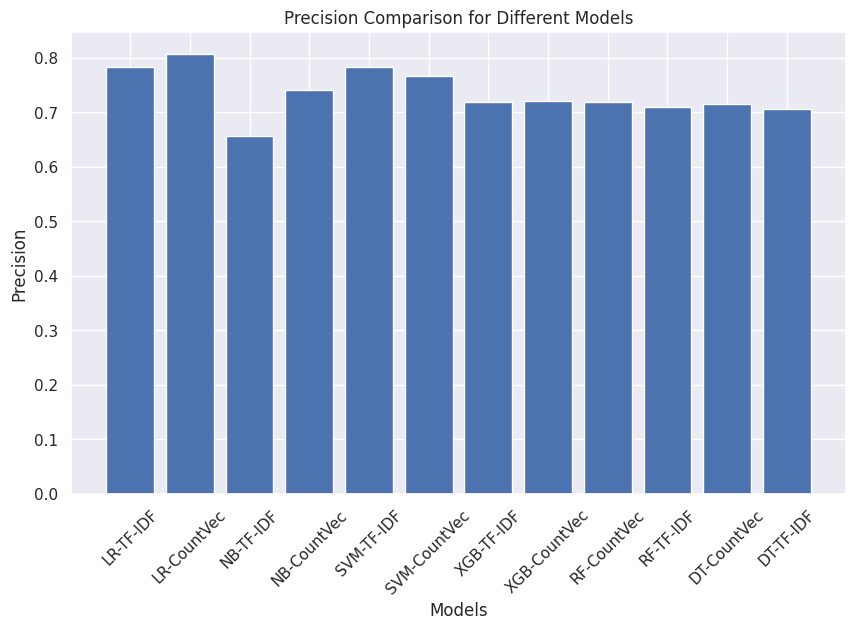

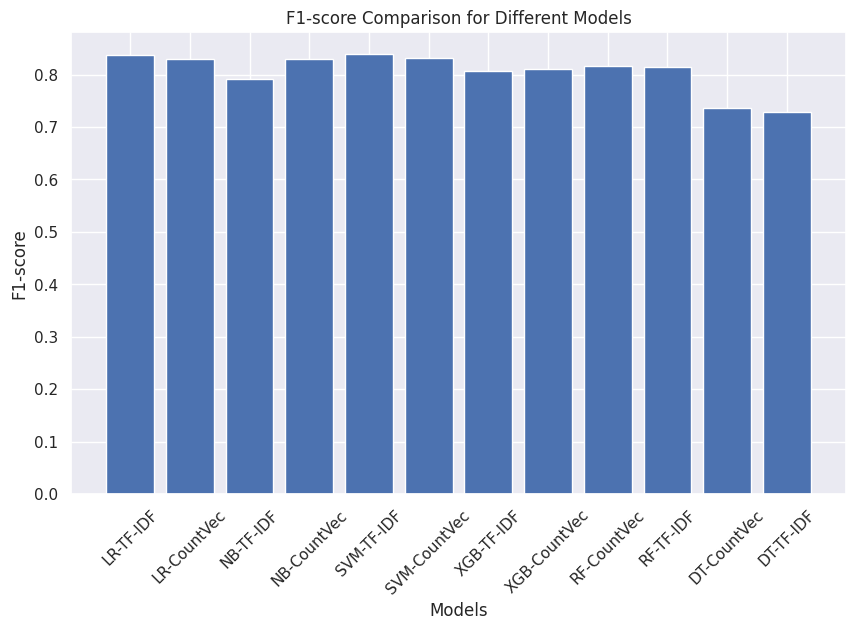

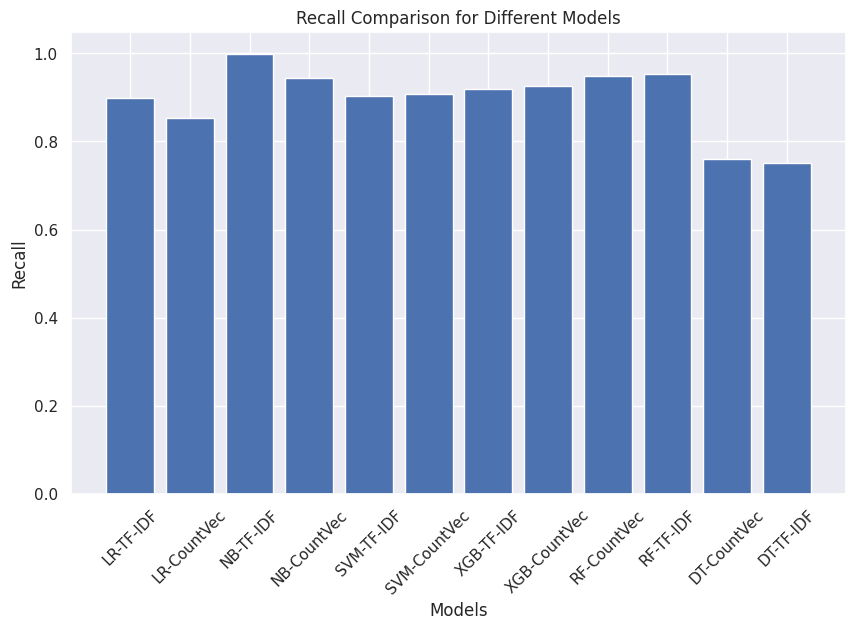

In [53]:

import matplotlib.pyplot as plt

# Define empty lists for each metric
accuracy_list = []
precision_list = []
f1score_list = []
recall_list = []

# Logistic Regression - TF-IDF
lr_tfidf_precision, lr_tfidf_recall, lr_tfidf_accuracy, lr_tfidf_f1 = calculate_metrics(y_test, lr_tfidf_pred)
accuracy_list.append(lr_tfidf_accuracy)
precision_list.append(lr_tfidf_precision)
f1score_list.append(lr_tfidf_f1)
recall_list.append(lr_tfidf_recall)

# Logistic Regression - CountVectorizer
lr_count_precision, lr_count_recall, lr_count_accuracy, lr_count_f1 = calculate_metrics(y_test, lr_count_pred)
accuracy_list.append(lr_count_accuracy)
precision_list.append(lr_count_precision)
f1score_list.append(lr_count_f1)
recall_list.append(lr_count_recall)

# Naive Bayes - TF-IDF
nb_tfidf_precision, nb_tfidf_recall, nb_tfidf_accuracy, nb_tfidf_f1 = calculate_metrics(y_test, nb_tfidf_pred)
accuracy_list.append(nb_tfidf_accuracy)
precision_list.append(nb_tfidf_precision)
f1score_list.append(nb_tfidf_f1)
recall_list.append(nb_tfidf_recall)

# Naive Bayes - CountVectorizer
nb_count_precision, nb_count_recall, nb_count_accuracy, nb_count_f1 = calculate_metrics(y_test, nb_count_pred)
accuracy_list.append(nb_count_accuracy)
precision_list.append(nb_count_precision)
f1score_list.append(nb_count_f1)
recall_list.append(nb_count_recall)

# SVM - TF-IDF
svm_tfidf_precision, svm_tfidf_recall, svm_tfidf_accuracy, svm_tfidf_f1 = calculate_metrics(y_test, svm_tfidf_pred)
accuracy_list.append(svm_tfidf_accuracy)
precision_list.append(svm_tfidf_precision)
f1score_list.append(svm_tfidf_f1)
recall_list.append(svm_tfidf_recall)

# SVM - CountVectorizer
svm_count_precision, svm_count_recall, svm_count_accuracy, svm_count_f1 = calculate_metrics(y_test, svm_count_pred)
accuracy_list.append(svm_count_accuracy)
precision_list.append(svm_count_precision)
f1score_list.append(svm_count_f1)
recall_list.append(svm_count_recall)

# XGBoost - TF-IDF
xgb_tfidf_precision, xgb_tfidf_recall, xgb_tfidf_accuracy, xgb_tfidf_f1 = calculate_metrics(y_test, xgb_tfidf_pred)
accuracy_list.append(xgb_tfidf_accuracy)
precision_list.append(xgb_tfidf_precision)
f1score_list.append(xgb_tfidf_f1)
recall_list.append(xgb_tfidf_recall)

# XGBoost - CountVectorizer
xgb_count_precision, xgb_count_recall, xgb_count_accuracy, xgb_count_f1 = calculate_metrics(y_test, xgb_count_pred)
accuracy_list.append(xgb_count_accuracy)
precision_list.append(xgb_count_precision)
f1score_list.append(xgb_count_f1)
recall_list.append(xgb_count_recall)

# Random Forest - CountVectorizer
rf_count_precision, rf_count_recall, rf_count_accuracy, rf_count_f1 = calculate_metrics(y_test, rf_count_pred)
accuracy_list.append(rf_count_accuracy)
precision_list.append(rf_count_precision)
f1score_list.append(rf_count_f1)
recall_list.append(rf_count_recall)



# Random Forest - TF-IDF
rf_tfidf_precision, rf_tfidf_recall, rf_tfidf_accuracy, rf_tfidf_f1 = calculate_metrics(y_test, rf_tfidf_pred)
accuracy_list.append(rf_tfidf_accuracy)
precision_list.append(rf_tfidf_precision)
f1score_list.append(rf_tfidf_f1)
recall_list.append(rf_tfidf_recall)

# Decision Tree - CountVectorizer
dt_count_precision, dt_count_recall, dt_count_accuracy, dt_count_f1 = calculate_metrics(y_test, dt_count_pred)
accuracy_list.append(dt_count_accuracy)
precision_list.append(dt_count_precision)
f1score_list.append(dt_count_f1)
recall_list.append(dt_count_recall)

# Decision Tree - TF-IDF
dt_tfidf_precision, dt_tfidf_recall, dt_tfidf_accuracy, dt_tfidf_f1 = calculate_metrics(y_test, dt_tfidf_pred)
accuracy_list.append(dt_tfidf_accuracy)
precision_list.append(dt_tfidf_precision)
f1score_list.append(dt_tfidf_f1)
recall_list.append(dt_tfidf_recall)

# Bar graph for accuracy
plt.figure(figsize=(10, 6))
models = ['LR-TF-IDF', 'LR-CountVec', 'NB-TF-IDF', 'NB-CountVec', 'SVM-TF-IDF', 'SVM-CountVec', 'XGB-TF-IDF', 'XGB-CountVec', 'RF-CountVec', 'RF-TF-IDF', 'DT-CountVec', 'DT-TF-IDF']
plt.bar(models, accuracy_list)
plt.title('Accuracy Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# Bar graph for precision
plt.figure(figsize=(10, 6))
plt.bar(models, precision_list)
plt.title('Precision Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()

# Bar graph for F1-score
plt.figure(figsize=(10, 6))
plt.bar(models, f1score_list)
plt.title('F1-score Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('F1-score')
plt.xticks(rotation=45)
plt.show()

# Bar graph for recall
plt.figure(figsize=(10, 6))
plt.bar(models, recall_list)
plt.title('Recall Comparison for Different Models')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.xticks(rotation=45)
plt.show()

